# Машинное обучение, ФКН ВШЭ

## Практическое задание 14. Оптимизация гиперпараметров.

### Общая информация

Дата выдачи: 04.06.2022

Мягкий дедлайн: 19.06.2022 23:59 MSK

Жёсткий дедлайн: 21.06.2022 23:59 MSK

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

### Формат сдачи

Задания сдаются через систему anytask. Посылка должна содержать:

- Ноутбук `homework-practice-14-Username.ipynb`
- Модули `distributions.py` и `optimizers.py`, содержащие написанный вами код

Username — ваша фамилия на латинице

### О задании

В этом задании вам предстоит разработать свой собственный AutoML фреймворк, который будет подбирать оптимальные значения гиперпараметров для определенной модели и обучающих данных. Попутно вы познакомитесь с основными концепциями Байесовской оптимизации и узнаете, как Гауссовские процессы и метод Парзеновского окна применяются на практике. Если вы все сделаете правильно, то на выходе получится фреймворк, не уступающий популярной `optuna`.

### Ссылки на все контесты
Имя в контесте: 	Zhumataev Zhantu \
A) https://contest.yandex.ru/contest/37803/run-report/69030400/ \
B) https://contest.yandex.ru/contest/37803/run-report/69035527/ \
C) https://contest.yandex.ru/contest/37803/run-report/69035569/ \
D) https://contest.yandex.ru/contest/37803/run-report/69056409/ \
E) https://contest.yandex.ru/contest/37803/run-report/69053888/ \
F) https://contest.yandex.ru/contest/37803/run-report/69056652/

## 1. AutoML фреймворк (7.5 баллов)

Наш фреймворк будет работать по аналогии с классом [`OptunaSearchCV`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.OptunaSearchCV.html#optuna.integration.OptunaSearchCV) из пакета `optuna`, который интегрирован с интерфейсом `sklearn`. Общая схема следующая: сначала мы выбираем модель, для которой будем подбирать гиперпараметры, и задаем распределения на них (решаем, будет ли параметр вещественным или целочисленным; определяем границы; выбираем линейную или логарифмическую шкалу). Далее, на каждой итерации мы выбираем новый набор значений гиперпараметров и оцениваем качество модели на них с помощью кросс-валидации. За ограниченное число итераций находим лучший набор гиперпараметров и обучаем итоговую модель на всех данных. Условимся, что мы хотим **максимизировать** значение метрики (в случае, если мы хотим минимизировать метрику, будем брать ее с минусом). Отличие между различными стратегиями поиска заключается в том, как именно выбираются новые значения гиперпараметров. Подробнее об этом ниже.

Вашу реализацию кода нужно будет протестировать через [ЯндексКонтест](https://contest.yandex.ru/contest/37803/). Помимо стандартных библиотек Python 3.7, в контесте доступны `numpy=1.21.6`, `scipy=1.7.3` и `scikit-learn=1.0.2`, а также их зависимости.

**Задание 1.1 (0.5 балла).** Реализуйте распределения гиперпараметров в файле `distributions.py`. Каждый класс должен поддерживать метод `sample`, который возвращает выборку из распределения. Кроме того, для численных распределений нам понадобится метод `scale`, который переводит выборку в промежуток $[0, 1]$ (с линейной шкалой) (за подробностями обращайтесь к док-строкам в базовых классах). Чуть позже станет понятнее, как нам пригодится эта функция. Задача в контесте: [ссылка](https://contest.yandex.ru/contest/37803/problems/A/). \
**>>>Done**

**Задание 1.2 (1 балл).** Реализуйте методы `sample_params`, `cross_validate`, `fit`, `predict` и `predict_proba` класса `BaseOptimizer` в файле `optimizers.py`. Обратите внимание, что разбиение на фолды должно быть одинаковым для каждой итерации оптимизации (чтобы оценивать наборы гиперпараметров честно). Кроме того, не забывайте о воспроизводимости экспериментов: запуски всех алгоритмов, содержащих случайность, должны контролироваться с помощью `random_seed`. Также сохраняйте историю параметров и метрики в поля `self.params_history` и `self.scores_history`.\
**>>>Done**

**Задание 1.3 (0.5 балла).** Реализуйте простейшую возможную стратегию &mdash; стратегию случайного поиска в классе `RandomSearchOptimizer` из файла `optimizers.py`. На каждой новой итерации алгоритма мы генерируем новый случайный набор гиперпараметров, не производя никакого дополнительного отбора. Задача в контесте: [ссылка](https://contest.yandex.ru/contest/37803/problems/B/)\
**>>>Done**

In [1]:
import numpy as np
from distributions import UniformDistribution, CategoricalDistribution

In [2]:
UniformDistribution(0, 10).sample(5)

array([8.16036474, 7.36399495, 8.48228777, 8.38638212, 2.06517113])

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn import datasets

X, y = datasets.load_breast_cancer(return_X_y=True)
X.shape, y.shape

params = {"penalty":"l2", "solver":"saga", "C":0.1, "class_weight":"auto", "max_iter":5000}
clf = LogisticRegression()
clf.set_params(**params)

LogisticRegression(C=0.1, class_weight='auto', max_iter=5000, solver='saga')

In [4]:
cross_validate(clf, X, y, cv=5, scoring=None)['test_score'].mean()

0.9226672876882471

### Байесовская оптимизация

Далее мы перейдем к более продвинутым методам поиска гиперпараметров. Одним из наиболее распространенных подходов к этой задаче является **Байейсовская оптимизация**. Ее суть состоит в следующем: на каждой итерации мы будем аппроксимировать распределение $p(y|x)$, где $y$ &mdash; это значение метрики, а $x$ &mdash; значение набора гиперпараметров. Допустим, что $y^*$ &mdash; это наилучшее (наибольшее) текущее значение метрики. Чтобы выбрать новое значение гиперпараметров, для которого мы будем учить модель, нам понадобится величина под названием **Expected Impovement (EI)**. Она определяется следующим образом:

$$
\text{EI}_{y^*}(x) = \mathbb{E}_{y \sim p(y|x)} \Big[\max(0, y - y^*)\Big] = \int \max(0, y - y^*) p(y|x) dy
$$

Соответственно, чем выше значение EI, тем большего увеличения $y^*$ мы ожидаем, обучив модель с гиперпараметрами $x$. Таким образом, на каждой итерации оптимизации мы будем семлировать несколько кандидатов $x_i, i=1, \dots, N$ из исходного распределения гиперпараметров и выбирать из них наилучшего путем максимизации EI: $x_{\text{new}} = \arg\max_{x_i} \big\{\text{EI}_{y^*} (x_i)\big\}$. Нам осталось обсудить, как именно аппроксимировать распределение $p(y|x)$.

### Гауссовские процессы

[Гауссовские процессы](https://en.wikipedia.org/wiki/Gaussian_process) (ГП) &mdash; одна из популярных опций для задания распределения $p(y|x)$. Если не вдаваться в глубокую теорию, то можно воспринимать ГП как случайные функции. ГП задаются двумя параметрами: функцией среднего $\mu(x)$ и ковариационной функцией $K(x, x')$. Процесс называется гауссовским, поскольку в каждой отдельно взятой точке $x$ мы имеем нормальное распределение: $y(x) \sim \mathcal{N}\big(\mu(x), K(x, x)\big)$. А условие $\text{Cov}\big(y(x), y(x')\big) = K(x, x')$ объясняет название ковариационной функции. Как правило, для практических применений достаточно так называемых стационарных ГП, которые отличают константная функция среднего $\mu(x)=\text{const}$ (чаще всего даже $\mu(x)=0$) и ковариационная функция, зависящая только от расстояния между точками: $K(x, x') = K\big(\|x-x'\|\big)$. Часто под переменной $x$ понимают время (отсюда название "процесс"), но мы будет рассматривать в качестве $x$ наше пространство гиперпараметров.

На первый взгляд может показаться, что ГП мало чем могут быть полезны: ведь в каждой точке $x$ у нас свое собственное случайное значение $y$. Но оказывается, что если ковариационная функция непрерывна в нуле, то (почти все) реализации ГП (то есть интересующие нас случайные значения $y(x)$) непрерывны. Таким образом, каждая реализация ГП соответствует некоторой непрерывной функции, а значит, ГП можно использовать для регрессии.

Если задана обучающая выборка $\{(x_i, y_i)\}_{i=1}^{\ell}$, то мы можем посчитать распределение $p(y|x) = \mathcal{N}\big(y\big|\mu(x), \sigma^2(x)\big)$ для любой точки $x$ (замечание: здесь уже не будет выполняться $\mu(x)=0$, так как распределение на $y$ апостериорное, то есть зависит от обучающих данных). При этом, для разных ковариационных функций мы будем получать разные распределения. Обычно в качестве ковариационных функций используют ядра (да-да, те самые из теоремы Мерсера). Нам повезло, что все это уже реализовано в классе [`sklearn.gaussian_process.GaussianProcessRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor), и мы можем сконцентрироваться на алгоритмах оптимизации гиперпараметров.

Ниже приведен пример регрессии с помощью ГП:
![](https://www.researchgate.net/profile/Florent-Leclercq/publication/327613136/figure/fig1/AS:749406701776896@1555683889137/Illustration-of-Gaussian-process-regression-in-one-dimension-for-the-target-test.png)

Впрочем, в нашем случае, картинка будет выглядеть скорее так, поскольку $x$ будет многомерным:
![](https://raw.githubusercontent.com/jmaronas/TGP.pytorch/master/images/2D_GP.gif)

**Задание 1.4 (0.75 балла)**. Выведите аналитическую формулу для подсчета EI в случае $p(y|x) = \mathcal{N}\big(y\big|\mu(x), \sigma^2(x)\big)$ (подсказка: вам может пригодится значение функции распределения нормальной с.в.). \
Обозначим за $\phi(x) = \dfrac{1}{\sqrt{2\pi}}e^{-x^2 / 2}$ - плотность стандартной нормальной с.в. \
Стандартизируем значения метрики и обозначим их следующим образом:
$$
u^* = \dfrac{y^* - \mu}{\sigma}, \quad u = \dfrac{y - \mu}{\sigma} \text{, where } u \sim \phi(u).
$$
Тогда запишем expected improvement с новой плотностью:
$$
\text{EI}_{y^*}(x) = \int \max(0, y - y^*) p(y|x) dy = \\
= \int_{\mathbb{R}} (y - y^*) I\{y > y^*\} p(y|x) dy = \\
= \int_{\mathbb{R}} (\mu + \sigma u - y^*) I\{u > u^*\} \phi(u) du = \\
= \int_{u^*}^{+\infty} (\mu - y^* + \sigma u) \phi(u) du = \\
= (\mu - y^*)\, \big(1 - \Phi(u^*)\big) + \dfrac{\sigma}{\sqrt{2\pi}} \int_{u^*}^{+\infty}  u e^{-u^2 / 2} du = \\
= (\mu - y^*)\, \big(1 - \Phi(u^*)\big) - \dfrac{\sigma}{\sqrt{2\pi}} e^{-u^2 / 2} \bigg|_{u^*}^{+\infty} = \\
= (\mu - y^*)\, \big(1 - \Phi(u^*)\big) - \sigma \big(0 - \phi(u^*)\big) = \\
= - \sigma u^* \, \big(1 - \Phi(u^*)\big) + \sigma \phi(u^*).
$$

In [5]:
from scipy.stats import norm
mu = np.arange(5)
sigma = np.arange(1, 6)
y_star = 5

u_star = (y_star - mu) / sigma
sigma * (u_star * norm.cdf(y_star - mu) + norm.pdf(u_star))

array([5.00000005, 4.10785525, 3.72186248, 3.36276104, 2.79655822])

In [7]:
X.shape, y.shape

((569, 30), (569,))

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, WhiteKernel, RBF

kernel = WhiteKernel() + RBF()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


In [9]:
mu, sigma = gpr.predict(np.ones([250, 30]), return_std=True)

In [10]:
u_star = (5 - mu) / sigma
ei = - sigma * u_star * (1 - norm.cdf(u_star)) + sigma * norm.pdf(u_star)
ei.shape

(250,)

In [11]:
d = {'a': 111, 'b': 222, 'c': 333}
for i, p in enumerate(d.items()):
    print(p)

('a', 111)
('b', 222)
('c', 333)


In [12]:
sx = np.arange(30).reshape(-1, 3)
np.argmax(sx, axis=0)

array([9, 9, 9])

Теперь разберемся, как адаптировать ГП под наши нужды. Предлагается следующий план действий:

1. Пускай на очередной итерации алгоритма $j$ у нас есть выборка $\{(x_i, y_i)\}_{i=1}^{j-1}$, где $x_i$ &mdash; значение набора гиперпараметров, а $y_i$ &mdash; соответствующее ему значение метрики, посчитанное по кросс-валидации.


2. Если размер выборки меньше значения `self.num_dry_runs`, то возвращаем случайное значение гиперпараметров вместо запуска алгоритма. Таким образом, первые `self.num_dry_runs` итераций поиска подчиняются случайной стратегии, чтобы "набрать статистику" для работы алгоритма.


3. ГП работает только с непрерывными величинами, поэтому давайте переведем значения гиперпараметров в диапазон $[0, 1]$ (тут-то нам и понадобится функция `scale`) и получим отнормированные гиперпараметры $x_i \to \tilde{x}_i$. Как вы догадываетесь, такой трюк сработает только с численными гиперпараметрами (как с непрерывными, так и с дискретными). Что делать с категориальными гиперпараметрами, обсудим позже. 


4. Далее обучаем ГП на выборку $\{(\tilde{x}_i, y_i)\}_{i=1}^{j-1}$ (в качестве ковариационной функции возьмите сумму константного, белого и RBF ядер). 


5. Семплируем кандидатов в новые значения гиперпараметров $x^{\text{new}}_1, ..., x^{\text{new}}_N$ и преобразуем их функцией `scale`. Для каждого набора предсказываем параметры распределения $\mu(\tilde{x}), \sigma^2(\tilde{x})$, затем вычисляем $\text{EI}_{y^*}(\tilde{x})$ по формуле, посчитанной вами выше, и выбираем набор гиперпараметров $\tilde{x}^\text{new}_{*}$ с наибольшим значением EI.


6. Выбираем исходный набор гиперпараметров $x^\text{new}_{*}$, соответствующий $\tilde{x}^\text{new}_{*}$. Вуаля! Мы получили новый набор численных гиперпараметров, на котором будем валидировать модель.


Для категориальных гиперпараметров попробуем провернуть что-нибудь похожее. Пусть у нас есть выборка $\{(f_i, y_i)\}_{i=1}^{j-1}$, где $f$ &mdash; интересующий нас категориальный гиперпараметр, $f_i \in \{1, \dots, C\}$ &mdash; конечное множество категорий. Зафиксируем $c \in \{1, \dots, C\}$ и рассмотрим $p(y|с) = \mathcal{N}\big(y\big|\mu(с), \sigma^2(с)\big)$. Определим параметры распределений следующим образом (как среднее и сглаженную дисперсию по категории):

$$
\mu(c) = \begin{cases}
    \cfrac{\sum_i [f_i = c] \cdot y_i}{\sum_i [f_i = c]},& \sum_i [f_i = c] > 0 \\
    y^*,& \sum_i [f_i = c] = 0
\end{cases}
\quad\quad\quad
\sigma^2(c) = \frac{1 + \sum_i [f_i = c] (y_i - \mu(c))^2}{1 + \sum_i [f_i = c]}
$$

В итоге, как и в случае с численными гиперпараметрами, мы находим категорию с лучшей EI. Впрочем, обычно такие гиперпараметры имеют не очень много возможных значений (скажем, не больше 10 категорий, а в реальности скорее 2-3: например, критерий при построении дерева), поэтому мы можем себе позволить **перебрать все значения** категориального признака **вместо семплирования** (что и требуется от вас в реализации). Обратите внимание, что категориальные гиперпараметры нужно обрабатывать отдельно (то есть они не имеют ничего общего с ГП, который мы обучаем по численным гиперпараметрам). Конечно, у такого подхода есть значительный минус: категории рассматриваются независимо друг от друга и от численных гиперпараметров, но уж лучше так, чем никак. 

**Задание 1.5 (2 балла)**. Реализуйте недостающие методы в классе `GPOptimizer` в файле `optimizers.py`. Задачи в контесте: [раз](https://contest.yandex.ru/contest/37803/problems/С/), [два](https://contest.yandex.ru/contest/37803/problems/D/) \
**>>>Done**

### Tree-structured Parzen estimator (TPE)

Рассмотрим иной подход к приближению распределения $p(y|x)$. Он основан на использовании формулы Байеса:

$$
p(y|x) = \frac{p(x|y)p(y)}{p(x)}
$$

Эта формула позволяет нам моделировать распределение $p(x|y)$ вместо $p(y|x)$. Обозначим за $y^*$ $\gamma$-квантиль распределения $p(y)$, то есть $p(y < y^*) = \gamma$ (в отличие от ГП, где $y^*$ выступает как максимум распределения). Идея TPE заключается в следующем выражении для плотности $p(x|y)$:

$$
p(x|y) = \begin{cases}
    g(x),& y \ge y* \\
    l(x),& y < y^*,
\end{cases}
$$

где $l(x)$ &mdash; это аппроксимация распределения $x$ при значениях целевой метрики меньше порогового $y^*$, а $g(x)$ &mdash; наоборот, выше порогового. Оказывается, что такой способ задать распределение позволяет нам очень просто находить максимум EI:

**Задание 1.6 (0.75 балла)**. Докажите, что точка максимума EI совпадает с точкой максимума $\cfrac{g(x)}{l(x)}$.

$$
\text{EI}_{y^*}(x) = \int \max(0, y - y^*) p(y|x) dy = \\
\int_{y^*}^{+\infty} (y - y^*) p(y|x) dy = \\
\int_{y^*}^{+\infty} (y - y^*) \dfrac{p(x|y) p(y)}{p(x)} dy.
$$
Так как по построению $p(y < y^*) = \gamma$, то знаменатель EI равен
$$
p(x) = \int_{\mathbb{R}} p(x|y) p(y) dy = \mathbb{E}_y p(x|y) = \gamma l(x) + (1 - \gamma) g(x).
$$
Тогда как числитель EI можно записать следующим образом
$$
\int_{y^*}^{+\infty} (y - y^*) p(x|y) p(y) dy = \\
\int_{-\infty}^{y^*} (y^* - y) p(x|y) p(y) dy = \\
l(x) \int_{-\infty}^{y^*} (y^* - y) p(y) dy = \\
l(x)\gamma y^* - l(x) \int_{y^*}^{+\infty} p(y) dy.
$$
Отсюда, Expected Improvement пропорционален
$$
\text{EI}_{y^*}(x) = \dfrac{l(x) \gamma y^* - l(x) \int_{y^*}^{+\infty} p(y) dy}{\gamma l(x) + (1 - \gamma) g(x)} \propto \bigg( \gamma + \dfrac{g(x)}{l(x)} (1 - \gamma)\bigg)^{-1}.
$$

Источник: https://proceedings.neurips.cc/paper/2011/file/86e8f7ab32cfd12577bc2619bc635690-Paper.pdf


Таким образом, мы можем разделить все опробованные наборы гиперпараметров на две группы по значению целевой метрики, на каждой из них обучить свою оценку плотности ($g(x)$ или $l(x)$) и выбрать в качестве кандидата тот набор гиперпараметров, который имеет набольшее отношение плотностей. Такая процедура будет гарантировать нам максимизацию EI. В качестве алгоритма для приближения плотности мы будем пользоваться методом Парзеновского окна (он же Kernel Density Estimation, KDE), что и объясняет название оптимизатора (кстати, именно TPE находится под капотом у `optuna`). Как вы догадываетесь, KDE тоже реализован в [`sklearn.neighbors.KernelDensity`](https://www.youtube.com/watch?v=dQw4w9WgXcQ). И снова, такой подход позволяет обрабатывать только численные гиперпараметры. Получаем следующий алгоритм:

1. Пускай на очередной итерации алгоритма $j$ у нас есть выборка $\{(x_i, y_i)\}_{i=1}^{j-1}$, где $x_i$ &mdash; значение набора гиперпараметров, а $y_i$ &mdash; соответствующее ему значение метрики, посчитанное по кросс-валидации.


2. Если размер выборки меньше значения `self.num_dry_runs`, то возвращаем случайное значение гиперпараметров вместо запуска алгоритма.


3. Переводим значения гиперпараметров в диапазон $[0, 1]$ и получаем отнормированные гиперпараметры $x_i \to \tilde{x}_i$.


4. Считаем $\gamma$-квантиль выборки $y_1, \dots, y_{j-1}$ и делим значения гиперпараметров $\tilde{x}_1, \dots, \tilde{x}_{j-1}$ на две группы (воспользуйтесь `np.quantile`). 


5. На каждой группе обучаем KDE, чтобы получить оценки $g(\tilde{x})$ и $l(\tilde{x})$ (обратите внимание, что алгоритм возвращает логарифм оценки плотности). Используйте гауссовское ядро, в качестве параметра `bandwidth` возьмите медианное расстояние до 1-го ближайшего соседа в полной выборке. Остальные параметры оставьте по умолчанию.


6. Семплируем кандидатов в новые значения гиперпараметров $x^{\text{new}}_1, ..., x^{\text{new}}_N$ и преобразуем их функцией `scale`. Определяем точку:

$$
\tilde{x}^\text{new}_{*} = \arg\max_{i} \bigg\{\frac{g(\tilde{x}^{\text{new}}_i)}{l(\tilde{x}^{\text{new}}_i)}\bigg\}
$$


7. Выбираем исходный набор гиперпараметров $x^\text{new}_{*}$, соответствующий $\tilde{x}^\text{new}_{*}$.


Для категориальных гиперпараметров $f_i \in \{1, \dots, C\}$ нам тоже нужно определить $g(x)$ и $l(x)$. Определим вероятность категории $с \in \{1, \dots, C\}$ пропорциональной следующей величине:

$$
p(c) \propto N p_c + \sum_i [f_i = c], 
$$

где $N$ &mdash; число наборов гиперпараметров в группе (то есть это количество будет различным для $g(c)$ и $l(c)$), а $p_c$ &mdash; априорная вероятность категории (в нашем случае категории априорно равновероятны, $p_c = 1\,/\,C$). Сама вероятность $p(c)$ получается нормировкой по всем категориям гиперпараметра. И снова, мы будем **перебирать все значения** категориального признака **вместо семплирования**. Как и в случае ГП, категориальные гиперпараметры будут учитываться независимо от численных и друг от друга (тут даже можно выписать факторизацию распределения в виде $g(x) = g_{\text{num}}(x_\text{num}) \prod_{\text{cat}} g_{\text{cat}}(x_\text{cat})$, аналогично для $l(x)$, пусть эти формулы и не используются явно).

Выглядит итерация метода примерно так:

![](https://camo.githubusercontent.com/d14da729457267a66ebc9942b1ce57372adad287b74a1af5e0793f283c9bf1aa/687474703a2f2f6e657570792e636f6d2f5f696d616765732f7470652d73616d706c65642d63616e646964617465732e706e67)

**Задание 1.7 (2 балла)**. Реализуйте недостающие методы в классе `TPEOptimizer` в файле `optimizers.py`. Задачи в контесте: [раз](https://contest.yandex.ru/contest/37803/problems/E/), [два](https://contest.yandex.ru/contest/37803/problems/F/)
**>>>Done**

In [13]:
%load_ext autoreload
%autoreload 2

In [14]:
import distributions as D
import optimizers as O

## 2. Эксперименты (7.5 баллов)

**Задание 2.1 (1 балл)**. Сгенерируйте случайную выборку наборов гиперпараметров и выборку значений метрик. Замерьте время работы метода `select_params` для `GPOptimizer` и `TPEOptimizer`. Постройте график зависимости времени работы от размера выборки, сделайте выводы. Какую алгоритмическую сложность имеют алгоритмы?

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
params_distr = {'n_estimators': D.IntUniformDistribution(50, 300), 
                'max_depth': D.IntUniformDistribution(3, 10), 
                'learning_rate': D.UniformDistribution(0.01, 1), 
                'boosting_type': D.CategoricalDistribution(['gbdt', 'dart', 'goss']), 
                'num_leaves': D.IntUniformDistribution(20, 50), 
                'min_child_samples': D.IntUniformDistribution(5, 50),
                'colsample_bytree': D.UniformDistribution(0, 1)}
estimator = LGBMClassifier(class_weight='balanced')

In [ ]:
gp_search = O.GPOptimizer(estimator, params_distr, num_runs=40, scoring='neg_log_loss',
                        cv=3, num_dry_runs=5, num_samples_per_run=10, random_state=42)
tpe_search = O.TPEOptimizer(estimator, params_distr, num_runs=40, scoring='neg_log_loss',
                        cv=3, num_dry_runs=5, num_samples_per_run=10, random_state=42)

In [320]:
# Функция сэмплирующая гиперпараметры из распределения
def sample(params_distr, sample_size):
    param_samples = dict()
    for param in params_distr.keys():
        param_samples[param] = params_distr[param].sample(sample_size)
    
    return param_samples

In [324]:
from time import time

In [348]:
gp_perfomance = []

for sample_size in range(250, 4001, 250):
    time0 = time()
    params_history = sample(params_distr, sample_size)
    scores_history = np.random.normal(size=sample_size)
    sampled_params = sample(params_distr, 10)
    gp_search.select_params(params_history, 
                            scores_history,
                            sampled_params)
    gp_perfomance.append(time() - time0)

In [349]:
tpe_perfomance = []

for sample_size in range(250, 4001, 250):
    time0 = time()
    params_history = sample(params_distr, sample_size)
    scores_history = np.random.normal(size=sample_size)
    sampled_params = sample(params_distr, 10)
    tpe_search.select_params(params_history, 
                             scores_history,
                             sampled_params)
    tpe_perfomance.append(time() - time0)

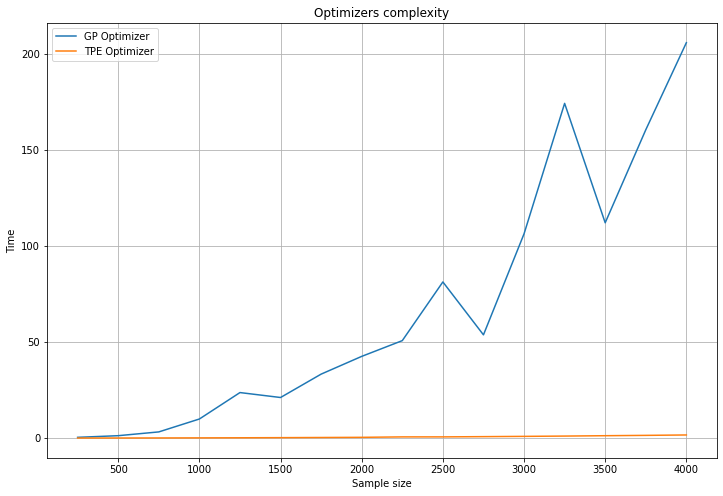

In [353]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(250, 4001, 250), gp_perfomance, label='GP Optimizer')
plt.plot(np.arange(250, 4001, 250), tpe_perfomance, label='TPE Optimizer')

plt.title('Optimizers complexity')
plt.xlabel('Sample size')
plt.ylabel('Time')
plt.legend()
plt.grid();

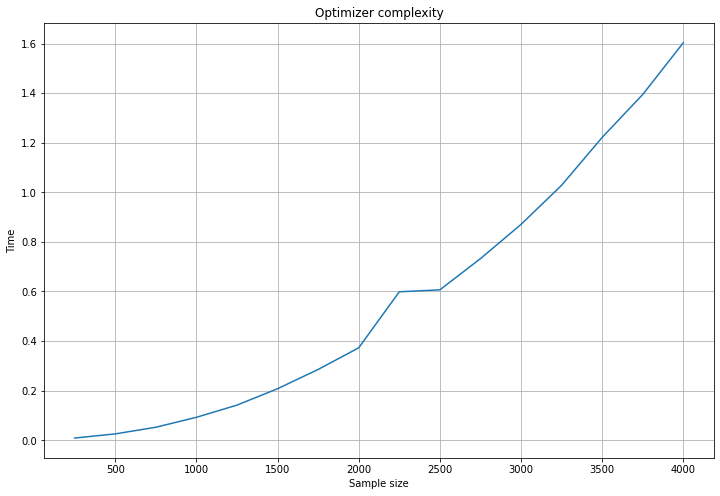

In [354]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(250, 4001, 250), tpe_perfomance, label='TPE Optimizer')

plt.title('Optimizer complexity')
plt.xlabel('Sample size')
plt.ylabel('Time')
plt.grid();

> Из графиков предположу, то GP Optimizer имеет нелинейную сложность, скорее квадратичную, тогда как время работы TPE Optimizer примерно линейно по размеру выборки. 

Дальнейшие эксперименты будет проводить на [наборе данных](https://www.kaggle.com/datasets/piyushagni5/white-wine-quality) о качестве белого вина.

**Задание 2.2 (3 балла)**. Будем тестировать оптимизаторы на (барабанная дробь...) бустингах. Выберите библиотеку градиентного бустинга, которая приходится вам по душе и задайте распределения на гиперпараметры. Среди ваших гиперпараметров обязательно должны быть число деревьев, глубина дерева и learning rate, также добавьте еще 4-5 гиперпараметров по вашему желанию (среди них должен быть хотя бы один категориальный). Подумайте, какие распределения лучше всего подходят для каждого гиперпараметра.

Как и всегда, разделите выборку на обучение и тест, предсказывать будем рейтинг вина (колонка `quality`). Хоть рейтинги и можно упорядочить, давайте решим задачу многоклассовой классификации на этих данных. В качестве метрики качества возьмем log loss. Мы будем сравнивать три стратегии для поиска, реализованные вами и [`OptunaSearchCV`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.OptunaSearchCV.html#optuna.integration.OptunaSearchCV) из библиотеки `optuna`, который имеет такой же интерфейс. Давайте ограничим наш бюджет поиска 40 итерациями. Обучите каждый из этих четырех методов по нескольку раз, чтобы посмотреть на дисперсию метрики (как минимум 3 раза, а в идеале раз 5, если позволяет время).

In [105]:
# !pip install optuna

In [17]:
from optuna.integration import OptunaSearchCV
import optuna.distributions as optD
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [36]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('winequality-white.csv', sep=';')

X = df.drop('quality', axis=1)
y = df['quality']
y.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)
estimator = LGBMClassifier(class_weight='balanced')

### Optuna Search

In [164]:
opt_params_distr = {'n_estimators': optD.IntUniformDistribution(50, 300), 
                    'max_depth': optD.IntUniformDistribution(3, 10), 
                    'learning_rate': optD.UniformDistribution(0.01, 1), 
                    'boosting_type': optD.CategoricalDistribution(['gbdt', 'dart', 'goss']), 
                    'num_leaves': optD.IntUniformDistribution(20, 50), 
                    'min_child_samples': optD.IntUniformDistribution(5, 50),
                    'colsample_bytree': optD.UniformDistribution(0, 1)}

In [165]:
%%time
optuna_search = OptunaSearchCV(estimator, opt_params_distr, n_trials=40, scoring='neg_log_loss', cv=3)
optuna_search.fit(X_train, y_train)

CPU times: user 3min 7s, sys: 6.01 s, total: 3min 13s
Wall time: 1min 49s


In [166]:
optuna_search.best_params_

{'boosting_type': 'dart',
 'colsample_bytree': 0.7354274303635201,
 'learning_rate': 0.16527227020837873,
 'max_depth': 8,
 'min_child_samples': 13,
 'n_estimators': 224,
 'num_leaves': 35}

In [167]:
optuna_search = OptunaSearchCV(estimator, opt_params_distr, n_trials=40, scoring='neg_log_loss', cv=3)

In [168]:
optuna_scores_hist = []
optuna_best_scores = []
optuna_test_scores = []

for i in range(5):
    np.random.seed(i)
    optuna_search.fit(X_train, y_train)
    
    scores_hist = optuna_search.study_.trials_dataframe()['user_attrs_mean_test_score'].to_numpy()
    test_score = -log_loss(y_test, optuna_search.predict_proba(X_test))
    
    optuna_scores_hist.append(scores_hist)
    optuna_best_scores.append(optuna_search.best_score_)
    optuna_test_scores.append(test_score)
    print(f'Iteration: {i}')

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [183]:
optuna_best_scores

[-1.0008530943948613,
 -1.0631271868761303,
 -1.0162087813894052,
 -1.0929332656475368,
 -1.009720581118006]

### Random Search

In [184]:
params_distr = {'n_estimators': D.IntUniformDistribution(50, 300), 
                'max_depth': D.IntUniformDistribution(3, 10), 
                'learning_rate': D.UniformDistribution(0.01, 1), 
                'boosting_type': D.CategoricalDistribution(['gbdt', 'dart', 'goss']), 
                'num_leaves': D.IntUniformDistribution(20, 50), 
                'min_child_samples': D.IntUniformDistribution(5, 50),
                'colsample_bytree': D.UniformDistribution(0, 1)}

In [185]:
%%time
r_search = O.RandomSearchOptimizer(estimator, params_distr, num_runs=40, scoring='neg_log_loss', cv=3)
r_search.fit(X_train, y_train)
r_search.best_params

CPU times: user 2min 34s, sys: 4.1 s, total: 2min 38s
Wall time: 1min 25s


In [186]:
r_search.best_params

{'boosting_type': 'dart',
 'colsample_bytree': 0.7636554731873668,
 'learning_rate': 0.44015081471542494,
 'max_depth': 10,
 'min_child_samples': 45,
 'n_estimators': 112,
 'num_leaves': 23}

In [187]:
def train(optimizer):
    optimizer_scores_hist = []
    optimizer_best_scores = []
    optimizer_test_scores = []

    for i in range(5):
        np.random.seed(i)
        optimizer.fit(X_train, y_train)
        test_score = -log_loss(y_test, optimizer.predict_proba(X_test))

        optimizer_best_scores.append(optimizer.best_score)
        optimizer_scores_hist.append(optimizer.scores_history)
        optimizer_test_scores.append(test_score)
        print(f'Iteration: {i}')
        
    return optimizer_best_scores, optimizer_scores_hist, optimizer_test_scores

In [188]:
r_search = O.RandomSearchOptimizer(estimator, params_distr, num_runs=40, scoring='neg_log_loss', cv=3)

In [189]:
%%time
rs_best_scores, rs_scores_hist, rs_test_scores = train(r_search)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
CPU times: user 11min 2s, sys: 21.8 s, total: 11min 24s
Wall time: 6min 23s


In [190]:
rs_best_scores

[-1.0125304976002047,
 -0.9912605655313005,
 -1.0555161325201405,
 -0.9918513245545021,
 -1.0838015346808962]

In [191]:
rs_test_scores

[-0.9532429369078124,
 -0.9467327555034266,
 -1.004036701305991,
 -0.9908930839100012,
 -0.9633634579471793]

### GP Optimizer

In [192]:
%%time
gp_search = O.GPOptimizer(estimator, params_distr, num_runs=40, scoring='neg_log_loss',
                        cv=3, num_dry_runs=5, num_samples_per_run=10, random_state=42)
gp_search.fit(X_train, y_train)
gp_search.best_params

CPU times: user 6min 58s, sys: 13.5 s, total: 7min 12s
Wall time: 4min 4s


In [193]:
gp_search.best_score

-1.0175384563594456

In [194]:
gp_train = O.GPOptimizer(estimator, params_distr, num_runs=40, scoring='neg_log_loss',
                        cv=3, num_dry_runs=5, num_samples_per_run=10)

In [198]:
gp_best_scores, gp_scores_hist, gp_test_scores = train(gp_train)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [196]:
gp_best_scores

[-1.0414515706357517,
 -1.0230739130492454,
 -1.2252120433594715,
 -1.0385860680209182,
 -1.0503943260590531]

### TPE Optimizer

In [211]:
tpe_search = O.TPEOptimizer(estimator, params_distr, num_runs=40, scoring='neg_log_loss',
                            cv=3, num_dry_runs=5, num_samples_per_run=10, random_state=42)
tpe_search.fit(X_train, y_train)
tpe_search.best_params

{'boosting_type': 'dart',
 'colsample_bytree': 0.6032194102133722,
 'learning_rate': 0.24450185338473723,
 'max_depth': 8,
 'min_child_samples': 11,
 'n_estimators': 169,
 'num_leaves': 47}

In [212]:
tpe_search.best_score

-0.9872866931848528

In [213]:
tpe_train = O.TPEOptimizer(estimator, params_distr, num_runs=40, scoring='neg_log_loss',
                            cv=3, num_dry_runs=5, num_samples_per_run=10)

In [215]:
tpe_best_scores, tpe_scores_hist, tpe_test_scores = train(tpe_train)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [216]:
tpe_best_scores

[-1.0338375516314204,
 -1.060322971277242,
 -1.0360337105260027,
 -1.0703767538538183,
 -1.0101210475895868]

In [217]:
df_results = pd.DataFrame({'Optuna Search': optuna_best_scores,
                           'Random Search': rs_best_scores,
                           'GP Optimizer': gp_best_scores,
                           'TPE Optimizer': tpe_best_scores})
df_results

,Optuna Search,Random Search,GP Optimizer,TPE Optimizer
0,-1.000853,-1.012530,-1.041452,-1.033838
1,-1.063127,-0.991261,-1.023074,-1.060323
2,-1.016209,-1.055516,-1.225212,-1.036034
3,-1.092933,-0.991851,-1.038586,-1.070377
4,-1.009721,-1.083802,-1.050394,-1.010121


In [218]:
df_test = pd.DataFrame({'Optuna Search': optuna_test_scores,
                        'Random Search': rs_test_scores,
                        'GP Optimizer': gp_test_scores,
                        'TPE Optimizer': tpe_test_scores})
df_test

,Optuna Search,Random Search,GP Optimizer,TPE Optimizer
0,-0.974612,-0.953243,-0.962825,-0.969089
1,-1.053464,-0.946733,-0.974854,-1.045332
2,-1.003289,-1.004037,-1.236336,-1.045070
3,-1.022992,-0.990893,-1.013074,-1.039951
4,-0.953572,-0.963363,-0.938328,-0.983205


In [221]:
df_history = pd.DataFrame({'Optuna Search history': optuna_scores_hist,
                           'Random Search history': rs_scores_hist,
                           'GP Optimizer history': gp_scores_hist,
                           'TPE Optimizer history': tpe_scores_hist})

In [220]:
df_results.columns

Index(['Optuna Search', 'Random Search', 'GP Optimizer', 'TPE Optimizer'], dtype='object')

Теперь попробуем визуализировать, что у нас получилось. Сделайте 4 сабплота, по одному на каждую стратегию поиска. На каждом графике изобразите лучшее найденное значение метрики, усредненное по запускам алгоритма, против номера итерации. Также нарисуйте область ± одного стандартного отклонения лучшего значения метрики. Кроме того, на том же графике сделайте scatter-plot **(номер итерации, значение метрики)** для этого запуска (именно для текущего набора гиперпараметра с итерации, а не лучшее, как для прошлого графика). Можете рисовать scatter-plot для всех повторных запусков сразу.

Прокомментируйте наблюдаемое. Какой(-ие) алгоритм(-ы) показали себя лучше всего? Какой(-ие) можно назвать более стабильным(-и)?

In [222]:
import matplotlib.pyplot as plt

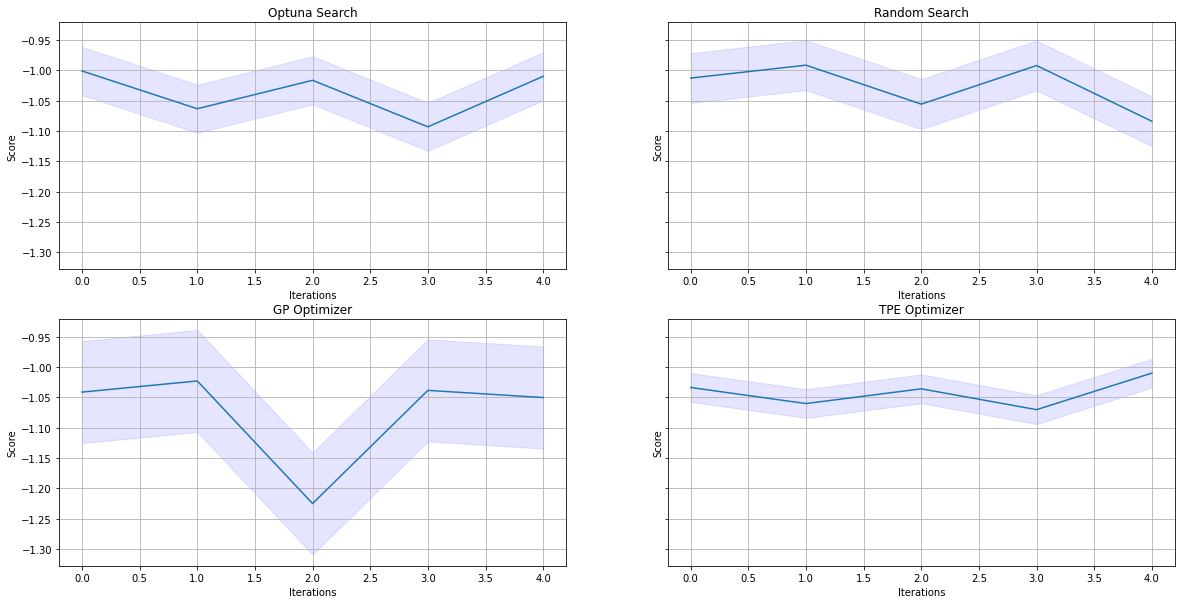

In [233]:
fig, axes = plt.subplots(2,2, figsize = (20, 10), sharey=True)

for model, ax in zip(df_results.columns, axes.flatten()):
    name = f'{model}'
    ax.set_title(name)

    ax.plot(np.arange(5), df_results[name])
    ax.fill_between(np.arange(5), 
                    (df_results[name] - df_results[name].std()), 
                    (df_results[name] + df_results[name].std()), color='b', alpha=.1)
        
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Score')
    ax.grid()

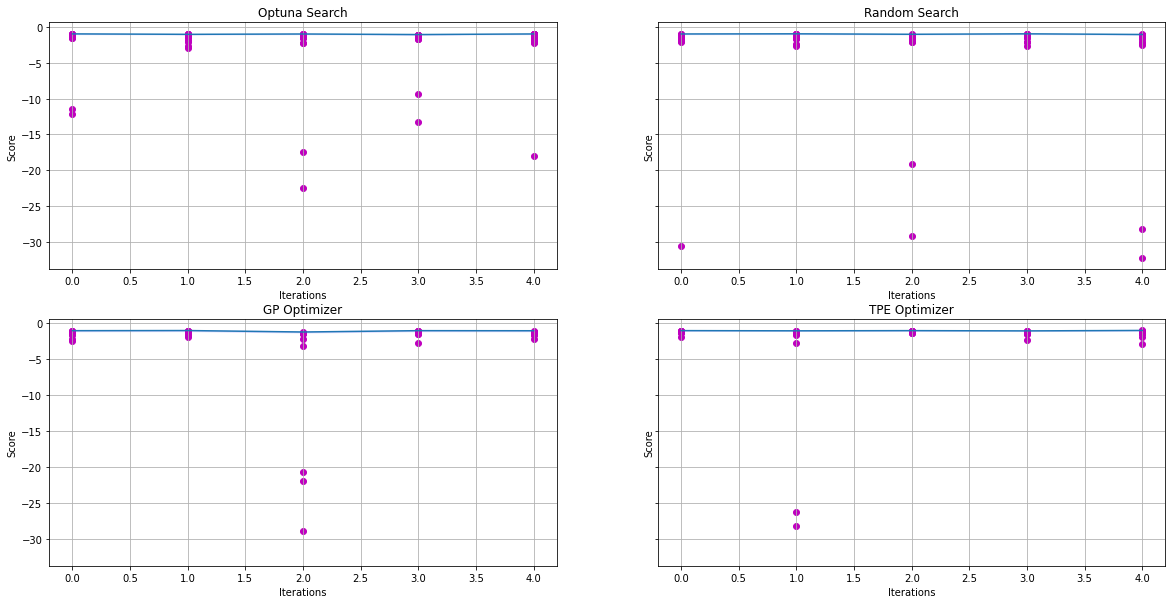

In [247]:
fig, axes = plt.subplots(2,2, figsize = (20, 10), sharey=True)

for model, ax in zip(df_results.columns, axes.flatten()):
    name = f'{model}'
    ax.set_title(name)

    ax.plot(np.arange(5), df_results[name])
    ax.fill_between(np.arange(5), 
                    (df_results[name] - df_results[name].std()), 
                    (df_results[name] + df_results[name].std()), color='b', alpha=.1)
    for i in range(5):
        ax.scatter(x=np.array([i]*len(df_history[name + ' history'][i])), 
                   y=df_history[name + ' history'][i], color = 'm')
        
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Score')
    ax.grid()

> Наиболее стабильным получился TPE Optimizer и Optuna Search, который как раз таки основан на идее TPE Optimizer. Наша реализация TPE Optimizer показала схожий score по лучшей модели. GP Optimizer справился хуже с наибольшим разбросом.
При добавлении истории score графики становятся похожими из-за большого разброса значений в истории и доверительные интервалы почти не видны.

**Задание 2.3 (1.5 балла).** Теперь посмотрим на распределение $p(y|x)$, которое получилось у `GPOptimizer`. Рассмотрим плоскость значений гиперпараметров числа деревьев и learning rate. Настройте ГП на выборку истории значений этих двух гиперпараметров одного из `GPOptimizer`, обученных вами выше. Ядро возьмите такое же, какое использовалось при поиске. Визуализируйте среднее, которое предсказывает ГП на плоскости (вам поможет `plt.imshow` или `plt.scatter`). Также добавьте на рисунок точки из истории поиска. Не забудьте про colorbar'ы и правильные подписи отметок на осях. Сделайте выводы. 

In [250]:
from sklearn.gaussian_process.kernels import ConstantKernel, WhiteKernel, RBF
from sklearn.gaussian_process import GaussianProcessRegressor

In [264]:
distr = gp_search.param_distributions['n_estimators']
n_estimators = distr.scale(gp_search.params_history['n_estimators'])
learning_rate = gp_search.params_history['learning_rate']

X_num = np.vstack([n_estimators, learning_rate]).T

In [275]:
X_num.shape, gp_search.scores_history.shape

((40, 2), (40,))

In [273]:
kernel = ConstantKernel() + WhiteKernel() + RBF()

gpr = GaussianProcessRegressor(kernel)
gpr.fit(X_num, gp_search.scores_history)
mu, sigma = gpr.predict(X_num, return_std=True)

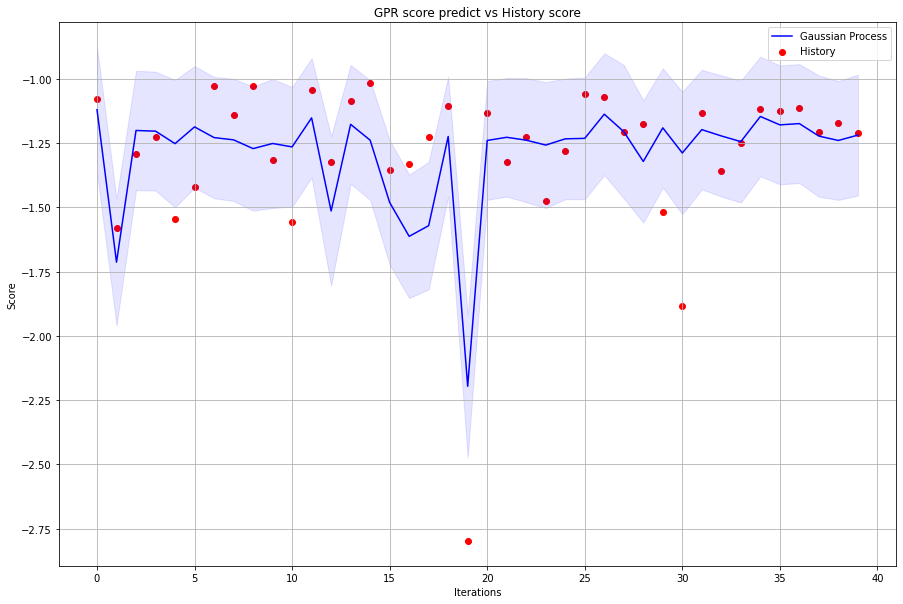

In [293]:
plt.figure(figsize = (15, 10))
plt.plot(mu, color = 'b', label='Gaussian Process')
plt.scatter(x=np.arange(len(mu)), y=gp_search.scores_history, color = 'r', label='History')
plt.fill_between(np.arange(len(mu)), 
                 (mu - sigma), 
                 (mu + sigma), color='b', alpha=.1)

plt.title('GPR score predict vs History score')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend()
plt.grid();

> GPOptimizer неплохо оценивает скоры, почти все точки попадают в доверительный интервал для скоров из истории.

**Задание 2.4 (1.5 балла)**. Аналогичным образом визуализируйте значения $\log g(x)$ и $\log l(x)$ на той же плоскости для `TPEOptimizer`. Параметр `bandwidth` оценивайте так же, как и в алгоритме поиска. Не забудьте добавить на рисунок точки из истории поиска (каждую из двух групп поместите на свой график). Что можно сказать о получившихся распределениях?

In [300]:
from sklearn.neighbors import KernelDensity, NearestNeighbors

In [ ]:
distr = tpe_search.param_distributions['n_estimators']
n_estimators = distr.scale(tpe_search.params_history['n_estimators'])
learning_rate = tpe_search.params_history['learning_rate']

X_num = np.vstack((n_estimators, learning_rate)).T

In [302]:
nn = NearestNeighbors(n_neighbors=1).fit(X_num)
bandwidth = np.median(nn.kneighbors()[0])

0.06979827845632458

In [305]:
kde = KernelDensity(bandwidth=bandwidth)

q = np.quantile(tpe_search.scores_history, tpe_search.gamma)
X_g = X_num[tpe_search.scores_history >= q]
X_l = X_num[tpe_search.scores_history < q]

In [312]:
kde = KernelDensity(bandwidth=bandwidth)
kde = kde.fit(X_l)
log_kde_l = kde.score_samples(X_l)

kde = KernelDensity(bandwidth=bandwidth)
kde = kde.fit(X_g)
log_kde_g = kde.score_samples(X_g)

In [313]:
y_l = np.where(tpe_search.scores_history < q )
y_g = np.where(tpe_search.scores_history >= q )

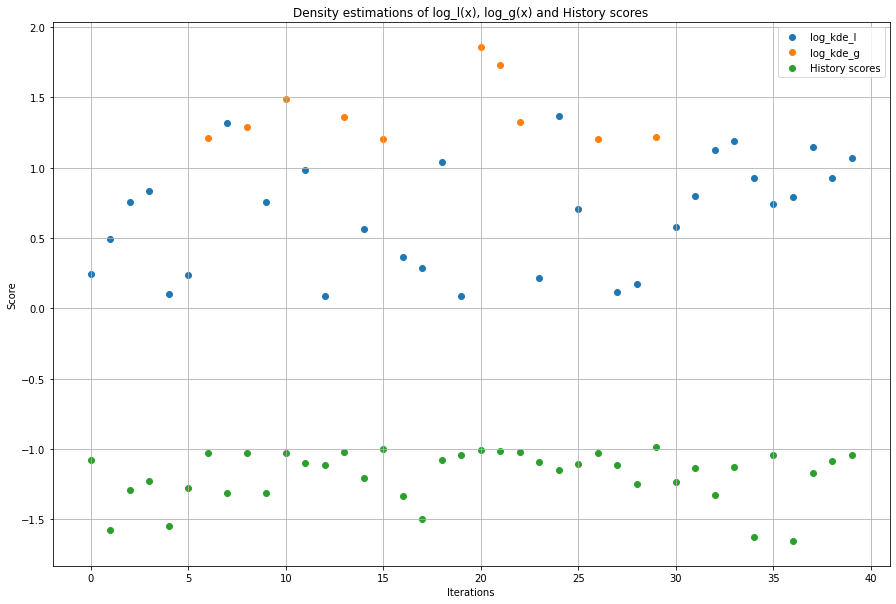

In [318]:
fig, ax = plt.subplots(figsize = (15,10))
score_history = tpe_search.scores_history

plt.scatter(x=y_l, y=log_kde_l, label='log_kde_l')
plt.scatter(x=y_g, y=log_kde_g, label='log_kde_g')
plt.scatter(x=range(len(score_history)), y=score_history, label='History scores')

plt.title('Density estimations of log_l(x), log_g(x) and History scores')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend()
plt.grid();

> TPE Optimizer также хорошо оценивает распределение, если вспомнить, что 


$$
p(y|x) = \begin{cases}
    \dfrac{g(x)p(x)}{p(y)},& y \ge y* \\
    \dfrac{l(x)p(x)}{p(y)},& y < y^*.
\end{cases}
$$

**Задание 2.5 (0.5 балла)**. И на последок визуализируем, как изменялись распределения для категориального гиперпараметра у разных стратегий поиска. В этом пункте вам предлагается построить три рисунка:

1. Ддя `GPOptimizer`: постройте графики $\mu(c) \pm \sigma(c)$ для каждой категории $c$ против номера итерации (все на одном рисунке). 


2. Для `TPEOptimizer`: постройте area plot для значений $g(c)$ против номера итерации.


3. Аналогично пункту 2 для значений $l(c)$.

Прокомментируйте то, что получилось.

In [366]:
gp_search.params_history['boosting_type']

array(['dart', 'goss', 'goss', 'goss', 'goss', 'gbdt', 'dart', 'dart',
       'dart', 'dart', 'gbdt', 'dart', 'dart', 'dart', 'dart', 'dart',
       'dart', 'dart', 'gbdt', 'gbdt', 'gbdt', 'gbdt', 'gbdt', 'gbdt',
       'gbdt', 'gbdt', 'gbdt', 'gbdt', 'gbdt', 'gbdt', 'gbdt', 'dart',
       'dart', 'gbdt', 'gbdt', 'gbdt', 'gbdt', 'gbdt', 'gbdt', 'gbdt'],
      dtype='<U32')

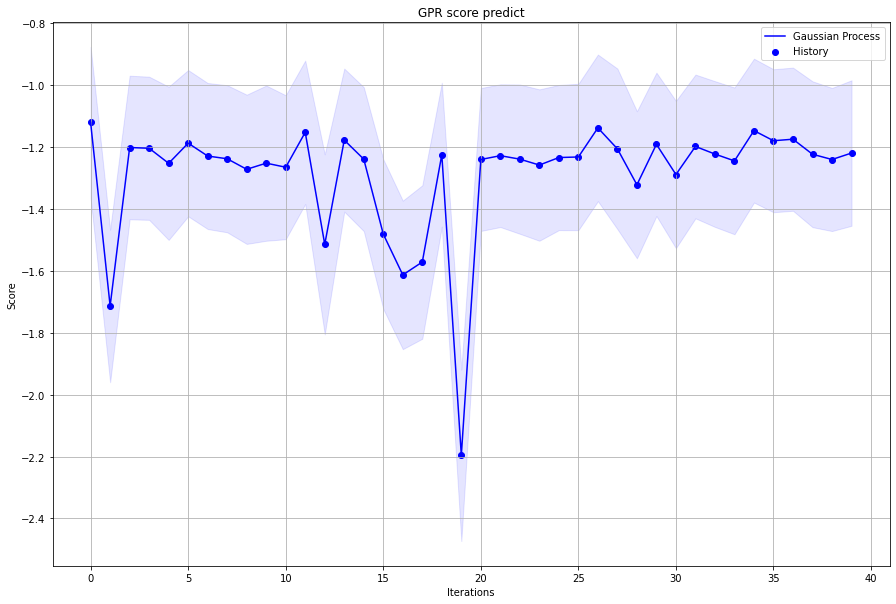

In [358]:
plt.figure(figsize=(15, 10))
plt.plot(mu, color='b', label='Gaussian Process')
plt.scatter(x=np.arange(len(mu)), y=mu, color='b', label='History')
plt.fill_between(np.arange(len(mu)), 
                 (mu - sigma), 
                 (mu + sigma), color='b', alpha=.1)

plt.title('GPR score predict')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend()
plt.grid();